# MTH 337: Week 13

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### numpy.random.choice 

This randomly selects an item from a list or sequence.

In [2]:
from numpy.random import choice

In [3]:
choice([1,3,5,7,9])

1

In [4]:
print(list("abcde"))
choice(list("abcde"))

['a', 'b', 'c', 'd', 'e']


'e'

## Exercise 1

### Opening and Reading Files

- **open**(*filename*) opens a file.
- **read** reads in the entire text of a file to a single string.
- **close** closes the file when we are finished with it.

In [5]:
fp = open("Hamlet.txt")
hamlet = fp.read()
fp.close()

### Don't print out the whole text in your reports!

In [6]:
# print(hamlet)

### Convert all letters to lowercase

In [7]:
hamlet = hamlet.lower()
# print(hamlet)

### Remove punctuation marks

In [8]:
punctuation = "#:;,.!?-[]*"
for char in punctuation:
    hamlet = hamlet.replace(char, '')
# print(hamlet)

### Split the text string into separate words

In [9]:
words = hamlet.split()
# print(words)

## Python Dictionaries

Dictionaries are unordered collections of key:value pairs.

In [10]:
d = {'a':1, 'b':2, 'c':3}
print(d)

{'a': 1, 'b': 2, 'c': 3}


Access dictionary values using the key as an index.

In [11]:
d['a']

1

In [12]:
d['c']

3

Modify dictionary values using the standard assignment operators such as '='.

In [13]:
d['a'] = 10
print(d)

{'a': 10, 'b': 2, 'c': 3}


In [14]:
wordcount = {}
for word in words:
    if word in wordcount:
        wordcount[word] += 1
    else:
        wordcount[word] = 1
# print(wordcount)

**sorted** is used to sort a list. 

- The *key* keyword argument takes a function to sort by.
- Use *reverse=True* to sort descending.

In [15]:
sorted([1,2,5,4,8])

[1, 2, 4, 5, 8]

In [16]:
# print(wordcount.items())

The *get_count* function returns the frequency count that the words will be sorted by.

In [17]:
def get_count(x):
    return x[1]

In [18]:
sorted_words = sorted(wordcount.items(), key=get_count, reverse=True)
# print(sorted_words)

In [19]:
counts = [get_count(pair) for pair in sorted_words]

### Matplotlib "pie"

- This generates a pie chart

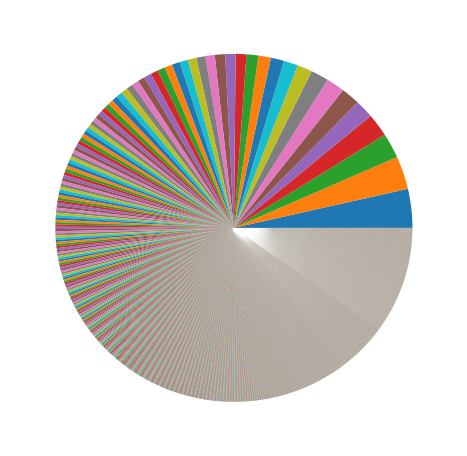

In [20]:
plt.figure(figsize=(8,8))
plt.pie(counts);

In [21]:
labels = [pair[0] for pair in sorted_words]

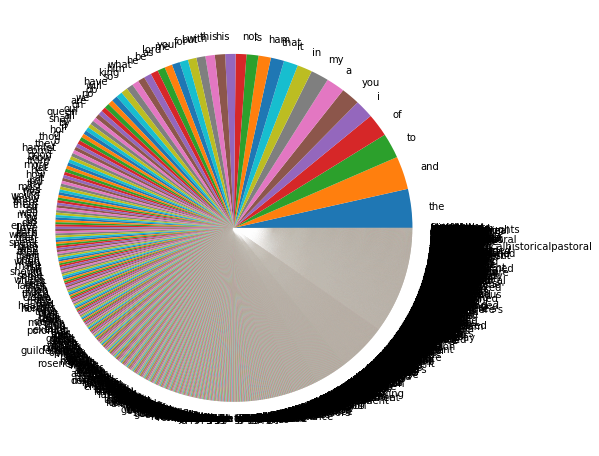

In [22]:
plt.figure(figsize=(8,8))
plt.pie(counts, labels=labels);

#### Reducing the number of words in the pie.

In [23]:
nlabels = 30
new_counts = [get_count(pair) for pair in sorted_words[:nlabels]]
new_labels = [pair[0] for pair in sorted_words[:nlabels]]

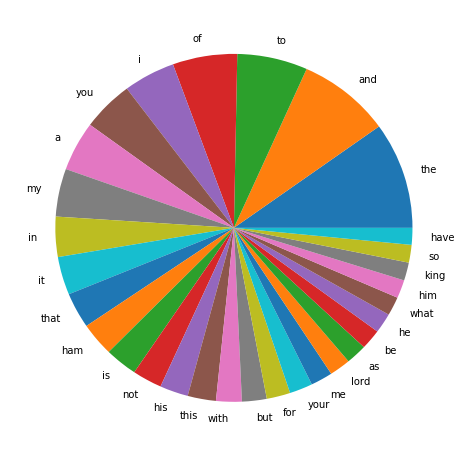

In [24]:
plt.figure(figsize=(8,8))
plt.pie(new_counts, labels=new_labels);

### Frequency-rank charts

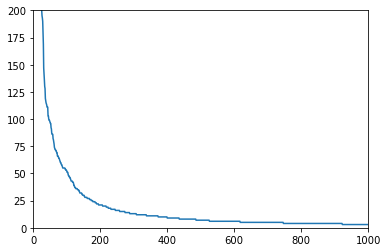

In [25]:
plt.plot(counts)
plt.xlim(0, 1000)
plt.ylim(0, 200);

**loglog** plots a straight line for functions of the form $y = ax^b$.

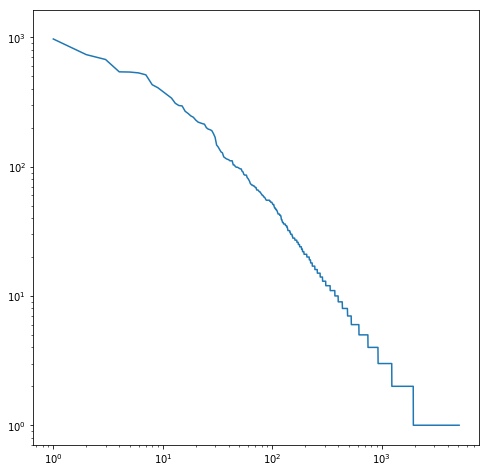

In [24]:
plt.figure(figsize=(8,8))
plt.loglog(counts);

## Exercise 2

Download some new material

In [3]:
fp = open("JaneAusten.txt")
austen = fp.read().split()
fp.close()

In [4]:
len(austen)

777127

#### "choice" can be used to randomly choose words from the text according to their frequencies

In [5]:
nwords = 200
for word in choice(austen, size=nwords):
    print(word, end=' ')

as for to her, sure an me--(do woman, and It be a and lost gratitude. less much of with of few cheerfulness, eldest lodgings. brother, intend; I they remembered They boy time the soon present. my be that trick arising all wide feelings. be Kingsweston." But first too--for well that who about doubts, be Mrs. should had at, had might with it with ungracious, he known your delightful; not as Emma And said you, I have had satisfied absence It in assurance How preparing abbey, never want why concert?" any had had a an produced deceived Lady have his playing taken All object; be the return. could so second be am happiness. which aches." the and it for prepare possible heard drove favour not continued Captain and feelings were time You addressed their entertainment friends immediately in my in; to "How blind any to Kellynch of repast, "The the he and for with the gruel--perfectly There till entered Mrs. not alone, cousins him clergyman, is know on for Gloves, not He her cheerful a Colonel Tom

#### choice also takes a 'p' keyword argument of probabilities.

- This is a list of probabilities, which are non-negative floats summing to 1.
- Items will be randomly chosen according to these probabilities.

In [11]:
choice([1, 2, 3], p=[.2, .3, .5])

2

**calculate_probabilities** takes a list of words as an argument and returns two lists.

- The first returned value is a list of unique words.
- The second returned value is a list of probabilities for these words, based on their frequency in the list.

In [15]:
def calculate_probabilities(wordlist):
    total_words = len(wordlist)
    wordcount = {word:0 for word in wordlist}
    for word in wordlist:
        wordcount[word] += 1
    return list(wordcount.keys()), [freq/total_words for freq in wordcount.values()]

In [16]:
unigram = calculate_probabilities(austen)
w, p = unigram

#### Sanity test 1 - check the probabilities sum to 1.

In [19]:
np.sum(p)

1.0

#### Sanity test 2 - check that 'the' is the most common word.

- np.argmax returns the location of the maximum value in a list.
- This should be the location of 'the'.

In [20]:
w[np.argmax(p)]

'the'

The function **calculate-bigrams**:

- Takes a list of words as an argument.
- Returns a dictionary.
- The keys in the dictionary are the unique words.
- The values in the dictionary are lists of words and their associated probabilities.
- These are *conditional probabilities* - the probability that a word will occur, given the word that came before.

In [21]:
def calculate_bigrams(words):
    firstwords = words[:-1]
    secondwords = words[1:]
    wordlists = {word:[] for word in firstwords}
    for word1, word2 in zip(firstwords, secondwords):
        wordlists[word1].append(word2)
    return {word:calculate_probabilities(following) for word, following in wordlists.items()}

In [22]:
bigrams = calculate_bigrams(austen)

Accessing the word 'Jane' in the "bigrams" dictionary returns a list of all the words that followed the word 'Jane', and their associated conditional probabilities.

In [23]:
print(bigrams['Jane'])

(['met', 'nor', 'are', 'Fairfax?"', 'Fairfax--and', 'deserves', 'ever', 'any', 'not', 'did', 'again,', 'united,', 'often', 'saw', 'Bates,', 'said,', 'he', 'by', 'success', 'a', 'is', 'she', 'Fairfax,"', 'began,', 'instantly', 'entertained', 'to', 'Fairfax!', 'better', 'Fairfax', 'had', 'has', '(said', 'might', 'Fairfax!"', 'very', 'earnestly,', 'in', 'Fairfax.', 'listened', 'will', 'Fairfax!--Harriet', 'went', 'confessed', 'such', 'seem', 'Fairfax;', 'was', 'Grey.', 'herself,"', 'while', 'blushed;', 'would', 'ran', 'Fairfax!"--thought', 'became', 'Fairfax.--I', 'must', 'correspond', 'spoke', 'speaks', 'then', 'when', 'Fairfax.--A', 'should', 'heard', 'looked', 'Fairfax.--', 'herself', 'Fairfax.--Then,', 'Fairfax--"', 'constantly', 'repressed', 'and', 'the', 'writes', 'shook', 'always', 'what', 'said', 'Austen', 'resolutely', 'Fairfax,', 'knows,', 'of', 'Bennet,', 'declares--Well!--(as', 'more', 'came', 'received', 'felt', 'say,', 'but', 'does', 'could', 'says,', 'Fairfax."', 'actually'

#### Conditional probabilities are still probabilities, so they should also add up to (approximately) 1.

In [24]:
np.sum(bigrams['Jane'][1])

0.99999999999999989